In [1]:
%matplotlib inline 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from brokenaxes import brokenaxes


In [2]:
vaccine_data_to_load = "vaccine-preventable-disease-cases-by-county-and-year-2.csv" 

#Read the Mouse and Drug Data and the Clinical Trial Data
Vax_Data = pd.read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv") 

file = 'Population_Data.csv'
file2 = 'Population_Data_2008_pivot_by_year.csv'

In [3]:
#Drop disease we are not going to analyze
dd = Vax_Data.set_index("disease")
dd_drop = dd.drop(["Diphtheria","Hepatitis A", "Hepatitis B, Acute", "Hepatitis C, Acute", "Invasive Meningococcal Disease", "Rubella", "Varicella Hospitalizations"])
dd_drop = dd_drop.reset_index()
dd_drop_counties = dd_drop.set_index("county")

# drop counties we are not going to analyze

# this is what I used to drop the counties with just adding commas:
#print(Vax_Data.iloc[:,1].unique())
# I copied and pasted the output.  I added 15 commas.  


dd_complete_4 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kern' ,'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa',
 'Nevada' ,'Orange', 'Placer' ,'Plumas', 'Riverside', 'Sacramento' ,'San Benito',
 'San Bernardino', 'San Diego' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo', 'San Mateo', 'Santa Barbara' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' ,'Sierra', 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura' ,'Yolo'])
dd_complete_4 = dd_complete_4.reset_index()

#same print unique, copy & paste, add commas. Looks ugly - but we are looking at the data, instead of looking at code

dd_complete_15 = dd_drop_counties.drop([ 'Alpine', 'Amador', 'Butte', 'Calaveras', 'California', 'Colusa',
 'Contra Costa', 'Del Norte', 'Fresno', 'Glenn' ,'Humboldt',
 'Imperial', 'Inyo', 'Kings' ,'Lake' ,'Lassen', 'Madera',
 'Marin', 'Mariposa', 'Mendocino', 'Modoc', 'Mono', 'Monterey',
 'Nevada' , 'Placer' ,'Plumas', 'Riverside' ,'San Benito',
 'San Bernardino' ,'San Francisco', 'San Joaquin',
 'San Luis Obispo' ,'Santa Clara' ,'Santa Cruz',
 'Shasta' , 'Siskiyou' ,'Solano' ,'Stanislaus', 'Sutter',
 'Tehama', 'Trinity', 'Tulare', 'Tuolumne' ,'Yolo'])

dd_complete_15 = dd_complete_15.reset_index()

# dd_complete_4 should be exported to csv for use in individual branches
# dd_complete_15 should also be exported for same reason
dd_complete_15.head()

,county,disease,year,count
0,Alameda,Measles,2001,1
1,Alameda,Measles,2002,0
2,Alameda,Measles,2003,2
3,Alameda,Measles,2004,0
4,Alameda,Measles,2005,0


In [4]:
#mung data to fit counts of measles per year (2009-2017) by county

dyr = dd_complete_15.set_index('year')
dyrs = dyr.drop([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_meas = ddyr_alameda[ddyr_alameda["disease"]== "Measles"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_meas = ddyr_la[ddyr_la["disease"]== "Measles"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_meas = ddyr_yuba[ddyr_yuba["disease"]== "Measles"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_meas = ddyr_sonoma[ddyr_sonoma["disease"]== "Measles"]


In [5]:
# now for Pertussis
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_pert = ddyr_alameda[ddyr_alameda["disease"]== "Pertussis"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_pert = ddyr_la[ddyr_la["disease"]== "Pertussis"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_pert = ddyr_yuba[ddyr_yuba["disease"]== "Pertussis"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_pert = ddyr_sonoma[ddyr_sonoma["disease"]== "Pertussis"]

ddyr_dorado = dyrs[dyrs["county"]== "El Dorado"]
ddyr_dorado_pert = ddyr_dorado[ddyr_dorado["disease"]== "Pertussis"]

ddyr_kern = dyrs[dyrs["county"]== "Kern"]
ddyr_kern_pert = ddyr_kern[ddyr_sonoma["disease"]== "Pertussis"]

ddyr_merced = dyrs[dyrs["county"]== "Merced"]
ddyr_merced_pert = ddyr_merced[ddyr_merced["disease"]== "Pertussis"]

ddyr_napa = dyrs[dyrs["county"]== "Napa"]
ddyr_napa_pert = ddyr_napa[ddyr_napa["disease"]== "Pertussis"]

ddyr_orange = dyrs[dyrs["county"]== "Orange"]
ddyr_orange_pert = ddyr_orange[ddyr_orange["disease"]== "Pertussis"]

ddyr_sacramento = dyrs[dyrs["county"]== "Sacramento"]
ddyr_sacramento_pert = ddyr_sacramento[ddyr_sacramento["disease"]== "Pertussis"]

ddyr_sand = dyrs[dyrs["county"]== "San Diego"]
ddyr_sand_pert = ddyr_sand[ddyr_sand["disease"]== "Pertussis"]

ddyr_san_m = dyrs[dyrs["county"]== "San Mateo"]
ddyr_san_m_pert = ddyr_san_m[ddyr_san_m["disease"]== "Pertussis"]

ddyr_santa = dyrs[dyrs["county"]== "Santa Barbara"]
ddyr_santa_pert = ddyr_santa[ddyr_santa["disease"]== "Pertussis"]

ddyr_sierra = dyrs[dyrs["county"]== "Sierra"]
ddyr_sierra_pert = ddyr_sierra[ddyr_sierra["disease"]== "Pertussis"]

ddyr_ventura = dyrs[dyrs["county"]== "Ventura"]
ddyr_ventura_pert = ddyr_ventura[ddyr_ventura["disease"]== "Pertussis"]



In [6]:
# now for Mumps
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_mump = ddyr_alameda[ddyr_alameda["disease"]== "Mumps"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_mump = ddyr_la[ddyr_la["disease"]== "Mumps"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_mump = ddyr_yuba[ddyr_yuba["disease"]== "Mumps"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_mump = ddyr_sonoma[ddyr_sonoma["disease"]== "Mumps"]



In [7]:
ddyr_alameda = dyrs[dyrs["county"]== "Alameda"]
ddyr_alameda_tet = ddyr_alameda[ddyr_alameda["disease"]== "Tetanus"]

ddyr_la = dyrs[dyrs["county"]== "Los Angeles"]
ddyr_la_tet = ddyr_la[ddyr_la["disease"]== "Tetanus"]

ddyr_yuba = dyrs[dyrs["county"]== "Yuba"]
ddyr_yuba_tet = ddyr_yuba[ddyr_yuba["disease"]== "Tetanus"]

ddyr_sonoma = dyrs[dyrs["county"]== "Sonoma"]
ddyr_sonoma_tet = ddyr_sonoma[ddyr_sonoma["disease"]== "Tetanus"]


In [8]:
#mung population data, added 2008 so i could get the difference between 2 years and end
#up with 9 values
pop_read = pd.read_csv(file2)
pop_years_change = pop_read.set_index("Years")
#pop_years_change = pop_years_change.drop(2018)
pop_for_change = pd.DataFrame(pop_years_change)
pop_for_change.head()

,Alameda County,El Dorado County,Kern County,Los Angeles County,Merced County,Napa County,Orange County,Sacramento County,San Diego County,San Mateo County,Santa Barbara County,Sierra County,Sonoma County,Ventura County,Yuba County
Years,,,,,,,,,,,,,,,
2008,1457169,172435,803474,9821342,238792,132488,3016765,1398762,301483,718494,401432,3087,468191,786932,72473
2009,1491482,178447,807407,9848011,245321,134650,3026786,1400949,3053793,718989,407057,3191,472102,802983,72925
2010,1513043,181133,841072,9822433,256732,136808,3016559,1421414,3103306,719725,424235,3221,484776,825130,72350
2011,1530998,180918,848140,9876727,259333,137750,3050867,1433739,3137372,728404,425481,3099,487423,830196,72492
2012,1554138,180578,853963,9938436,260971,138625,3080419,1445078,3175201,739427,429825,3067,490071,833801,72792


In [9]:
# Make dataframe that shows the difference of population over years for each county
# These new values should make for a better plot to compare against disease count over time
pop_diff = pop_for_change.values
pop_change= []

for i in range(1,len(pop_diff)):
    difference_results = pop_diff[i] - pop_diff[i-1]
    pop_change.append(difference_results)
pop_changes = pd.DataFrame(pop_change)
pop_changes.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,34313,6012,3933,26669,6529,2162,10021,2187,2752310,495,5625,104,3911,16051,452
1,21561,2686,33665,-25578,11411,2158,-10227,20465,49513,736,17178,30,12674,22147,-575
2,17955,-215,7068,54294,2601,942,34308,12325,34066,8679,1246,-122,2647,5066,142
3,23140,-340,5823,61709,1638,875,29552,11339,37829,11023,4344,-32,2648,3605,300
4,26109,919,8594,59669,1227,1081,27590,12672,36047,9586,4998,-38,4172,4800,322


In [10]:
perct_change = pop_changes.values
perct_diff = []
for i in range(1,len(perct_change)):
    perct_results = (perct_change[i]/pop_diff[i])*100
    perct_diff.append(perct_results)
percentage_differences = pd.DataFrame(perct_diff)
percentage_differences.columns = ['Alameda County', 'Dorado County','Kern County','Los Angeles County',
                                  'Merced County','Napa County','Orange County','Sacramento County',
                                  'San Diego County','San Mateo County','Santa Barbara County',
                                  'Sierra County','Sonoma County','Ventura County','Yuba County']
percentage_differences.head()

,Alameda County,Dorado County,Kern County,Los Angeles County,Merced County,Napa County,Orange County,Sacramento County,San Diego County,San Mateo County,Santa Barbara County,Sierra County,Sonoma County,Ventura County,Yuba County
0,1.445609,1.505209,4.169520,-0.259728,4.651457,1.602674,-0.337883,1.460796,1.621361,0.102366,4.220048,0.940144,2.684589,2.758091,-0.788481
1,1.186681,-0.118697,0.840356,0.552755,1.013119,0.688556,1.137322,0.867094,1.097733,1.205877,0.293705,-3.787644,0.546025,0.613964,0.196268
2,1.511432,-0.187930,0.686561,0.624792,0.631620,0.635209,0.968643,0.790869,1.205754,1.513309,1.020962,-1.032591,0.543265,0.434235,0.413839
3,1.679967,0.508921,1.006367,0.600386,0.470167,0.779802,0.895657,0.876908,1.135267,1.296409,1.162799,-1.238996,0.851305,0.575677,0.442356
4,1.798896,0.916820,0.857914,0.503125,0.934790,0.616294,0.717919,1.225725,1.237681,1.155788,1.042953,-1.617696,0.922623,0.518125,0.612742


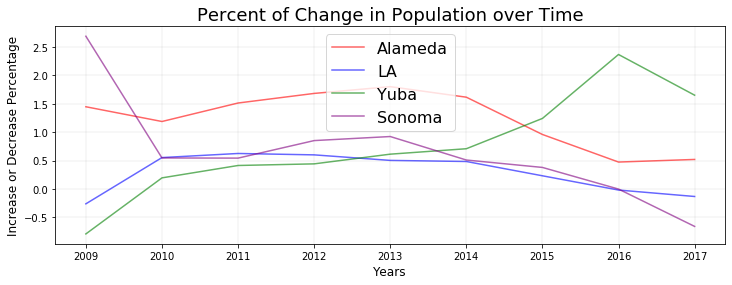

In [11]:
x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

plt.figure(figsize=(12,4))

plt.title('Percent of Change in Population over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Increase or Decrease Percentage', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.plot(x_axis, percentage_differences.iloc[:,0], color = 'r', alpha = 0.6, label = "Alameda")
plt.plot(x_axis, percentage_differences.iloc[:,3], color = 'b', alpha = 0.6, label = "LA")
plt.plot(x_axis, percentage_differences.iloc[:,14], color = 'g', alpha = 0.6, label = "Yuba")
plt.plot(x_axis, percentage_differences.iloc[:,12], color = 'purple', alpha = 0.6, label = "Sonoma")
plt.legend(fontsize = 16)

plt.savefig("Plot_images/Percent_Change_Population.png")
plt.show()


In [12]:
pop_changes_for_plot = pop_changes.drop(0)

diff_LA = pop_changes_for_plot.iloc[:,3]
diff_Yuba = pop_changes_for_plot.iloc[:,14]
diff_Alameda = pop_changes_for_plot.iloc[:,0]
diff_Sonoma = pop_changes_for_plot.iloc[:,12]


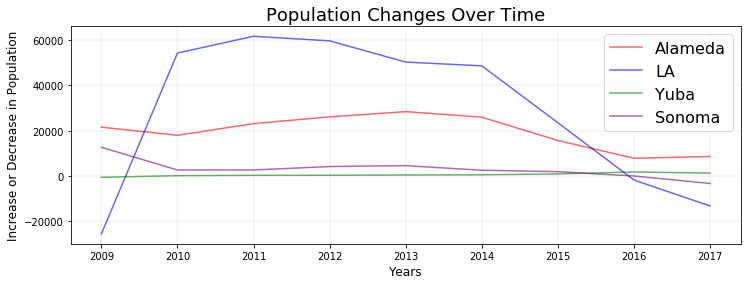

In [13]:
x_axis = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

plt.figure(figsize=(12,4))

plt.title('Population Changes Over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Increase or Decrease in Population', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.plot(x_axis, diff_Alameda, color = 'r', alpha = 0.6, label = "Alameda")
plt.plot(x_axis, diff_LA, color = 'b', alpha = 0.6, label = "LA")
plt.plot(x_axis, diff_Yuba, color = 'g', alpha = 0.6, label = "Yuba")
plt.plot(x_axis, diff_Sonoma, color = 'purple', alpha = 0.6, label = "Sonoma")
plt.legend(fontsize = 16)

plt.savefig("Plot_images/Population_Change_Time.png")
plt.show()


In [14]:
#The Graphs for compairing populations didn't read well becuase of the huge differences in total populations
#instead, I calculated the change per year of population to make the comparison more digestible

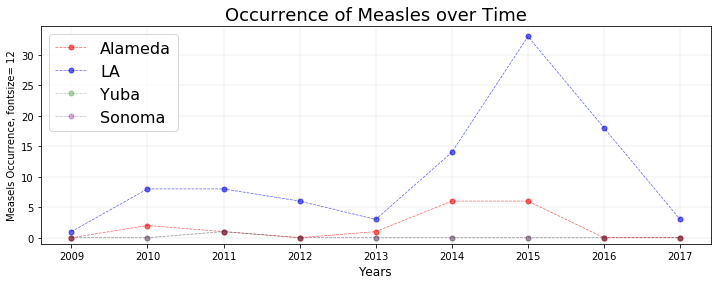

In [15]:

#setting up Measels plot lables, titles, etc.
plt.figure(figsize=(12,4))
plt.title('Occurrence of Measles over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Measels Occurrence, fontsize= 12')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#measles by 4 counties and years
plt.plot(x_axis, ddyr_alameda_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_meas.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)
plt.ylim(-1)
plt.legend(fontsize = 16)

plt.savefig("Plot_images/Measles_over_time.png")
plt.show()

#quick analysis = amounts of disease followed a trend easily seen in bigger populations, also seen in small


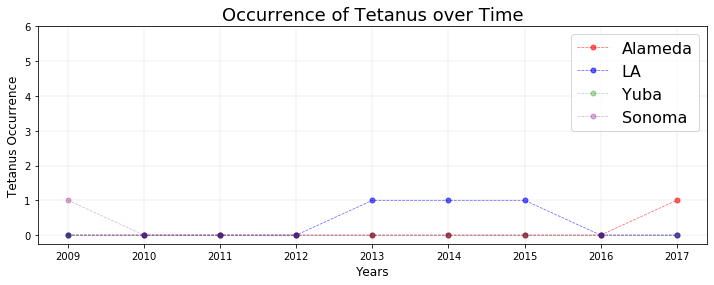

In [16]:
#now Tetanus
plt.figure(figsize=(12,4))
plt.title('Occurrence of Tetanus over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Tetanus Occurrence', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#tetanus by 4 counties and years
plt.plot(x_axis, ddyr_alameda_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_tet.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)

plt.ylim(-.25,6)
plt.legend(fontsize = 16)

plt.savefig("Plot_images/Tetanus over Time.png")
plt.show()


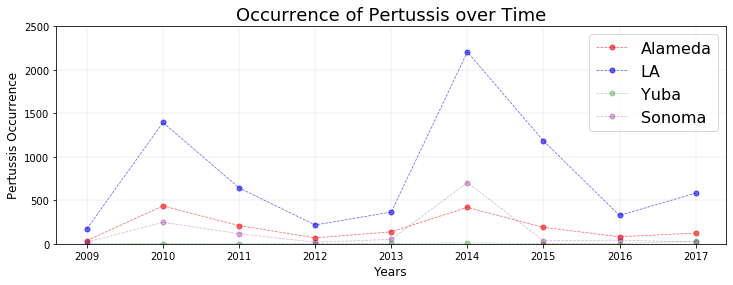

In [17]:
#now Pertussis
plt.figure(figsize=(12,4))
plt.title('Occurrence of Pertussis over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Pertussis Occurrence', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#tetanus by 4 counties and years
plt.plot(x_axis, ddyr_alameda_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis, ddyr_la_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis, ddyr_yuba_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis, ddyr_sonoma_pert.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)

plt.ylim(-.25,2500)
plt.legend(fontsize = 16)


plt.savefig("Plot_images/Pertussis over time.png")
plt.show()

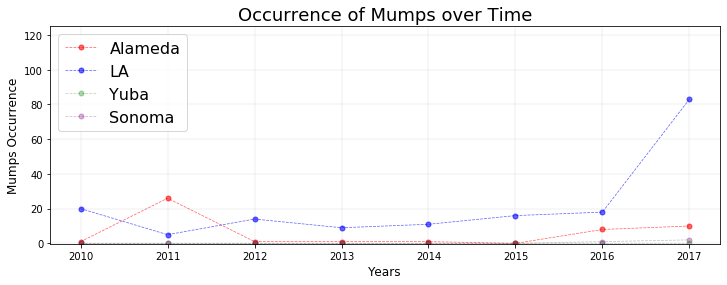

In [18]:
x_axis_mumps = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
plt.figure(figsize=(12,4))
plt.title('Occurrence of Mumps over Time', fontsize = 18)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Mumps Occurrence', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.plot(x_axis_mumps, ddyr_alameda_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'r', alpha = 0.6, label = "Alameda",)
plt.plot(x_axis_mumps, ddyr_la_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'b', alpha = 0.6, label = "LA",)
plt.plot(x_axis_mumps, ddyr_yuba_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'g', alpha = 0.3, label = "Yuba",)
plt.plot(x_axis_mumps, ddyr_sonoma_mump.iloc[:,2], marker = 'o', markersize=5, 
         linestyle="--", linewidth=0.75, color = 'purple', alpha = 0.3, label = "Sonoma",)

plt.ylim(-.25,125)
plt.legend(fontsize = 16)


plt.savefig("Plot_images/Mumps over time.png")
plt.show()

In [19]:
# This wasn't assigned to me but I had to see what it would look like:
# An actual scatter plot

In [20]:
pop_for_sct = pop_for_change.iloc[1:]
pop_for_sct = pop_for_sct.drop(2018)
pop_for_sct

Alameda_pop = pop_for_sct["Alameda County"]
LA_pop = pop_for_sct["Los Angeles County"]
Sonoma_pop = pop_for_sct["Sonoma County"]
Yuba_pop = pop_for_sct["Yuba County"]
Dorado_pop = pop_for_sct["El Dorado County"]
Kern_pop = pop_for_sct["Kern County"]
Merced_pop = pop_for_sct["Merced County"]
Napa_pop = pop_for_sct["Napa County"]
Orange_pop = pop_for_sct["Orange County"]
Sacramento_pop = pop_for_sct["Sacramento County"]
Sand_pop = pop_for_sct["San Diego County"]
San_m_pop = pop_for_sct["San Mateo County"]
Santa_pop = pop_for_sct["Santa Barbara County"]
Sierra_pop = pop_for_sct["Sierra County"]
Ventura_pop = pop_for_sct["Ventura County"]


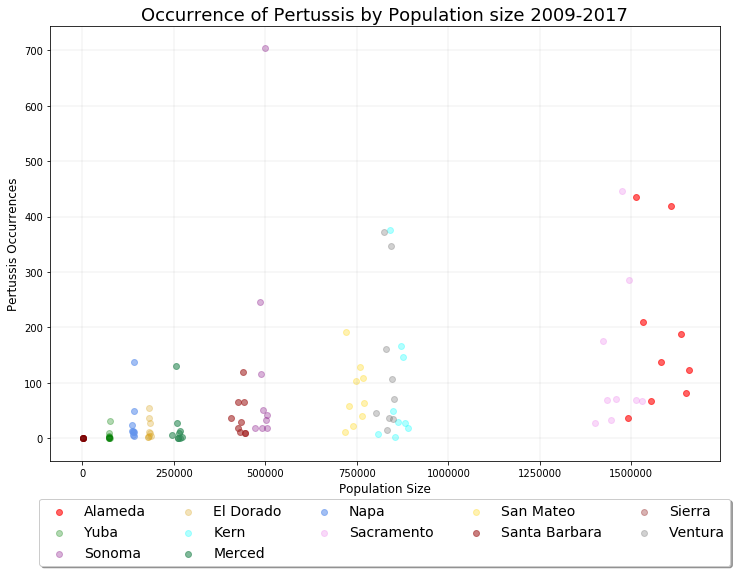

In [21]:
plt.figure(figsize=(12,8))
plt.title('Occurrence of Pertussis by Population size 2009-2017', fontsize = 18)
plt.xlabel("Population Size", fontsize=12)
plt.ylabel('Pertussis Occurrences', fontsize= 12)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

#tetanus by 4 counties and years
plt.scatter(Alameda_pop, ddyr_alameda_pert.iloc[:,2], 
          color = 'r', alpha = 0.6, label = "Alameda",)
#plt.scatter(LA_pop, ddyr_la_pert.iloc[:,2],
         # color = 'b', alpha = 0.6, label = "LA",)
plt.scatter(Yuba_pop, ddyr_yuba_pert.iloc[:,2],
          color = 'g', alpha = 0.3, label = "Yuba",)
plt.scatter(Sonoma_pop, ddyr_sonoma_pert.iloc[:,2],
          color = 'purple', alpha = 0.3, label = "Sonoma",)
plt.scatter(Dorado_pop, ddyr_dorado_pert.iloc[:,2],
          color = 'goldenrod', alpha = 0.3, label = "El Dorado",)
plt.scatter(Kern_pop, ddyr_kern_pert.iloc[:,2],
          color = 'cyan', alpha = 0.3, label = "Kern",)
plt.scatter(Merced_pop, ddyr_merced_pert.iloc[:,2],
          color = 'seagreen', alpha = 0.6, label = "Merced",)
plt.scatter(Napa_pop, ddyr_napa_pert.iloc[:,2],
          color = 'cornflowerblue', alpha = 0.6, label = "Napa",)
#plt.scatter(Orange_pop, ddyr_orange_pert.iloc[:,2],
         # color = 'indigo', alpha = 0.3, label = "Orange",)
plt.scatter(Sacramento_pop, ddyr_sacramento_pert.iloc[:,2],
          color = 'violet', alpha = 0.3, label = "Sacramento",)
#plt.scatter(Sand_pop, ddyr_sand_pert.iloc[:,2],
          #color = 'black', alpha = 0.6, label = "San Diego",)
plt.scatter(San_m_pop, ddyr_san_m_pert.iloc[:,2],
          color = 'gold', alpha = 0.3, label = "San Mateo",)
plt.scatter(Santa_pop, ddyr_santa_pert.iloc[:,2],
          color = 'brown', alpha = 0.6, label = "Santa Barbara",)
plt.scatter(Sierra_pop, ddyr_sierra_pert.iloc[:,2],
          color = 'maroon', alpha = 0.3, label = "Sierra",)
plt.scatter(Ventura_pop, ddyr_ventura_pert.iloc[:,2],
          color = 'dimgray', alpha = 0.3, label = "Ventura",)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5, fontsize = 14)
plt.savefig("Plot_images/Pertussis_by_pop(without 3 largest populations.png")
plt.show()



In [22]:
pop_per_cty_per_year = pop_for_change.transpose()
pop_per_cty_per_year

Years,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Alameda County,1457169,1491482,1513043,1530998,1554138,1580247,1608674,1634634,1650306,1658131,1666753
El Dorado County,172435,178447,181133,180918,180578,181497,183161,184660,186082,188722,190678
Kern County,803474,807407,841072,848140,853963,862557,869957,877197,882361,888988,896764
Los Angeles County,9821342,9848011,9822433,9876727,9938436,9998105,10048408,10097037,10120540,10118759,10105518
Merced County,238792,245321,256732,259333,260971,262198,264649,266651,267971,271340,274765
Napa County,132488,134650,136808,137750,138625,139706,140567,141096,141185,140386,139417
Orange County,3016765,3026786,3016559,3050867,3080419,3108009,3130322,3153962,3170707,3179950,3185968
Sacramento County,1398762,1400949,1421414,1433739,1445078,1457750,1475618,1494294,1511510,1527718,1540975
San Diego County,301483,3053793,3103306,3137372,3175201,3211248,3250993,3284061,3310280,3325468,3343364
San Mateo County,718494,718989,719725,728404,739427,749013,757670,765447,768204,768808,769545


In [23]:
dd_complete_15_test = dd_complete_15.groupby(['county', 'year']).sum().reset_index().set_index('county')

dd_09 = dd_complete_15_test[dd_complete_15_test['year'] == 2009].drop(columns=['year']).rename(columns={'count':'2009'})
dd_10 = dd_complete_15_test[dd_complete_15_test['year'] == 2010].drop(columns=['year']).rename(columns={'count':'2010'})
dd_11 = dd_complete_15_test[dd_complete_15_test['year'] == 2011].drop(columns=['year']).rename(columns={'count':'2011'})
dd_12 = dd_complete_15_test[dd_complete_15_test['year'] == 2012].drop(columns=['year']).rename(columns={'count':'2012'})
dd_13 = dd_complete_15_test[dd_complete_15_test['year'] == 2013].drop(columns=['year']).rename(columns={'count':'2013'})
dd_14 = dd_complete_15_test[dd_complete_15_test['year'] == 2014].drop(columns=['year']).rename(columns={'count':'2014'})
dd_15 = dd_complete_15_test[dd_complete_15_test['year'] == 2015].drop(columns=['year']).rename(columns={'count':'2015'})
dd_16 = dd_complete_15_test[dd_complete_15_test['year'] == 2016].drop(columns=['year']).rename(columns={'count':'2016'})
dd_17 = dd_complete_15_test[dd_complete_15_test['year'] == 2017].drop(columns=['year']).rename(columns={'count':'2017'})

dd_plot = pd.concat([dd_09, dd_10, dd_11, dd_12, dd_13, dd_14, dd_15, dd_16, dd_17], axis=1, sort=True)

dd_plot

,2009,2010,2011,2012,2013,2014,2015,2016,2017
county,,,,,,,,,
Alameda,37,439,236,69,139,426,195,89,134
El Dorado,2,54,11,3,4,36,27,12,5
Kern,8,377,49,2,30,167,146,27,18
Los Angeles,173,1423,656,236,378,2232,1234,362,668
Merced,7,131,29,0,2,9,14,1,2
Napa,17,25,11,6,13,137,49,5,13
Orange,93,501,147,77,117,481,201,75,228
Sacramento,27,175,70,37,71,447,286,71,77
San Diego,164,1145,404,162,412,2027,907,418,1180


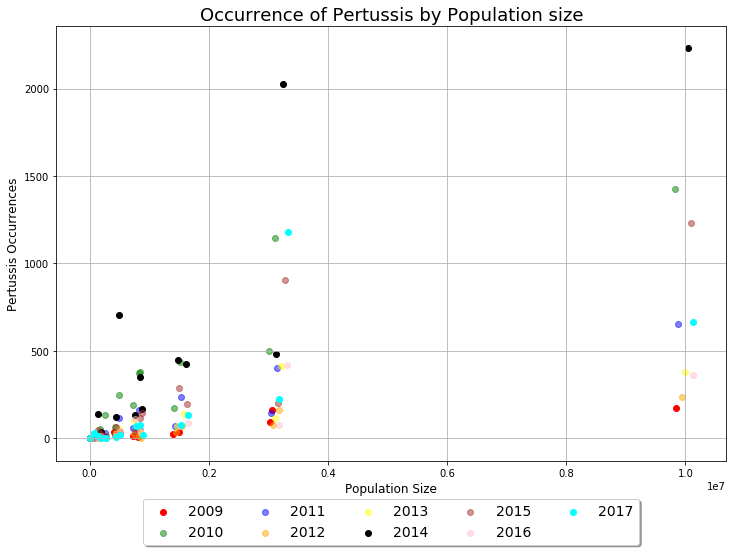

In [24]:
plt.figure(figsize=(12,8))
plt.title('Occurrence of Pertussis by Population size', fontsize = 18)
plt.xlabel("Population Size", fontsize=12)
plt.ylabel('Pertussis Occurrences', fontsize= 12)
plt.grid()

plt.scatter(pop_per_cty_per_year[2009], dd_plot['2009'], alpha = 1, label='2009', color='r')
plt.scatter(pop_per_cty_per_year[2010], dd_plot['2010'], alpha = 0.5, label='2010', color='g')
plt.scatter(pop_per_cty_per_year[2011], dd_plot['2011'], alpha = 0.5, label='2011', color='b')
plt.scatter(pop_per_cty_per_year[2012], dd_plot['2012'], alpha = 0.5, label='2012', color='orange')
plt.scatter(pop_per_cty_per_year[2013], dd_plot['2013'], alpha = 0.5, label='2013', color='yellow')
plt.scatter(pop_per_cty_per_year[2014], dd_plot['2014'], alpha = 1, label='2014', color='black')
plt.scatter(pop_per_cty_per_year[2015], dd_plot['2015'], alpha = 0.5, label='2015', color='brown')
plt.scatter(pop_per_cty_per_year[2016], dd_plot['2016'], alpha = 0.5, label='2016', color='pink')
plt.scatter(pop_per_cty_per_year[2017], dd_plot['2017'], alpha = 1, label='2017', color='cyan')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), fancybox=True, shadow=True, ncol=5, fontsize = 14)

plt.savefig("Plot_images/Occurences_by_Population_Size.png")

plt.show()